In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coffee = pd.read_csv("Project.csv")
print(coffee.head())

   transaction_id transaction_date transaction_time  store_id store_location  \
0          114301       01-06-2023         11:33:29         3        Astoria   
1          115405       02-06-2023         11:18:24         3        Astoria   
2          115478       02-06-2023         12:02:45         3        Astoria   
3          116288       02-06-2023         19:39:47         3        Astoria   
4          116714       03-06-2023         12:24:57         3        Astoria   

   product_id  transaction_qty  unit_price  Total_Bill product_category  \
0          45                1         3.0         3.0              Tea   
1          45                1         3.0         3.0              Tea   
2          45                1         3.0         3.0              Tea   
3          45                1         3.0         3.0              Tea   
4          45                1         3.0         3.0              Tea   

        product_type product_detail   Size Month Name  Day Name  Hou

In [2]:
print(coffee.columns)

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'Total_Bill', 'product_category', 'product_type', 'product_detail',
       'Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week'],
      dtype='str')


In [3]:
print(coffee.info())

<class 'pandas.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  str    
 2   transaction_time  149116 non-null  str    
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  str    
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  str    
 10  product_type      149116 non-null  str    
 11  product_detail    149116 non-null  str    
 12  Size              149116 non-null  str    
 13  Month Name        149116 non-null  str    
 14  Day Name          149116 non-null  str    
 15  Hour              149116 non-null  int64  
 16  Month             149116 non-nu

In [4]:
print(coffee.describe())

       transaction_id       store_id     product_id  transaction_qty  \
count   149116.000000  149116.000000  149116.000000    149116.000000   
mean     74737.371872       5.342063      47.918607         1.438276   
std      43153.600016       2.074241      17.930020         0.542509   
min          1.000000       3.000000       1.000000         1.000000   
25%      37335.750000       3.000000      33.000000         1.000000   
50%      74727.500000       5.000000      47.000000         1.000000   
75%     112094.250000       8.000000      60.000000         2.000000   
max     149456.000000       8.000000      87.000000         8.000000   

          unit_price     Total_Bill           Hour          Month  \
count  149116.000000  149116.000000  149116.000000  149116.000000   
mean        3.382219       4.686367      11.735790       3.988881   
std         2.658723       4.227099       3.764662       1.673091   
min         0.800000       0.800000       6.000000       1.000000   
25%   

In [5]:
print(coffee.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64


In [6]:
print(coffee.shape)

(149116, 18)


In [7]:
print(coffee.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
149111    False
149112    False
149113    False
149114    False
149115    False
Length: 149116, dtype: bool


In [8]:
print(coffee.dtypes)

transaction_id        int64
transaction_date        str
transaction_time        str
store_id              int64
store_location          str
product_id            int64
transaction_qty       int64
unit_price          float64
Total_Bill          float64
product_category        str
product_type            str
product_detail          str
Size                    str
Month Name              str
Day Name                str
Hour                  int64
Month                 int64
Day of Week           int64
dtype: object


In [9]:
print(coffee.nunique())

transaction_id      149116
transaction_date       181
transaction_time     25762
store_id                 3
store_location           3
product_id              80
transaction_qty          6
unit_price              41
Total_Bill              75
product_category         9
product_type            29
product_detail          45
Size                     4
Month Name               6
Day Name                 7
Hour                    15
Month                    6
Day of Week              7
dtype: int64


In [10]:
coffee['transaction_date'] = pd.to_datetime(coffee['transaction_date'],format='%d-%m-%Y')

In [11]:
print(coffee['transaction_date'].dtype)

datetime64[us]


In [12]:
coffee['transaction_time'] = pd.to_datetime(coffee['transaction_time'],format='%H:%M:%S')

In [13]:
print(coffee['transaction_time'].dtype)

datetime64[us]


In [14]:
coffee['month'] = coffee['transaction_date'].dt.month

In [15]:
best_seller = coffee.groupby('product_type')['Total_Bill'].sum()
print(best_seller)

product_type
Barista Espresso         91406.20
Biscotti                 19793.53
Black tea                 2711.85
Brewed Black tea         47932.00
Brewed Chai tea          77081.95
Brewed Green tea         23852.50
Brewed herbal tea        47539.50
Chai tea                  4301.25
Clothing                  6163.00
Drinking Chocolate        2728.04
Drip coffee              31984.00
Espresso Beans            5560.25
Gourmet Beans             6798.00
Gourmet brewed coffee    70034.60
Green beans               1340.00
Green tea                 1470.75
Herbal tea                2729.75
Hot chocolate            72416.00
House blend Beans         3294.00
Housewares                7444.00
Organic Beans             8509.50
Organic Chocolate         1679.60
Organic brewed coffee    37746.50
Pastry                   25655.99
Premium Beans            14583.50
Premium brewed coffee    38781.15
Regular syrup             6084.80
Scone                    36866.12
Sugar free syrup          2324.00
N

In [16]:
store_total_bills = coffee.groupby('store_location')['Total_Bill'].sum()
print(store_total_bills)

store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: Total_Bill, dtype: float64


In [17]:
product_total_bills = coffee.groupby('product_category')['Total_Bill'].sum()
print(product_total_bills.sort_values(ascending=False))

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: Total_Bill, dtype: float64


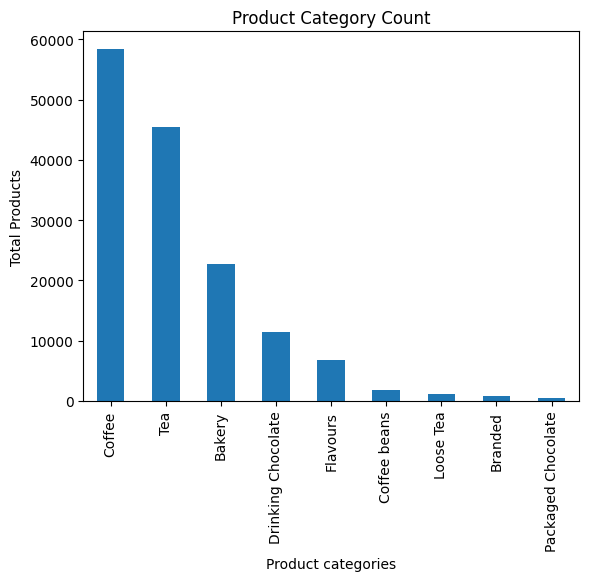

In [18]:
coffee['product_category'].value_counts().plot(kind='bar')
plt.title('Product Category Count')
plt.ylabel('Total Products')
plt.xlabel('Product categories')
plt.show()

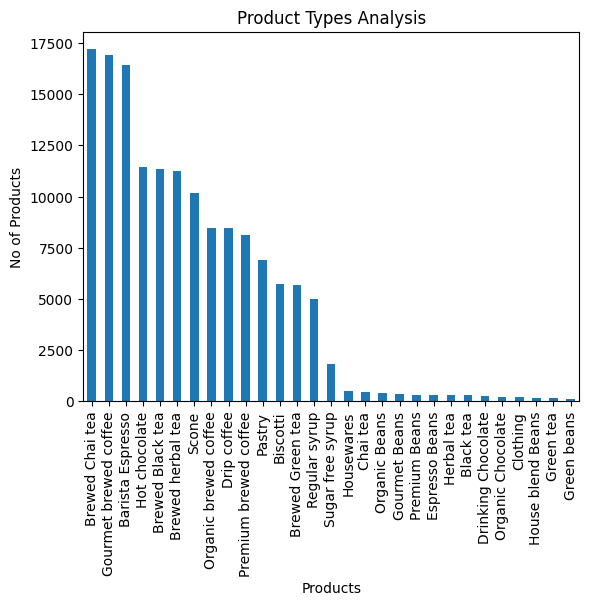

In [19]:
coffee['product_type'].value_counts().plot(kind='bar')
plt.title('Product Types Analysis')
plt.ylabel('No of Products')
plt.xlabel('Products')
plt.show()

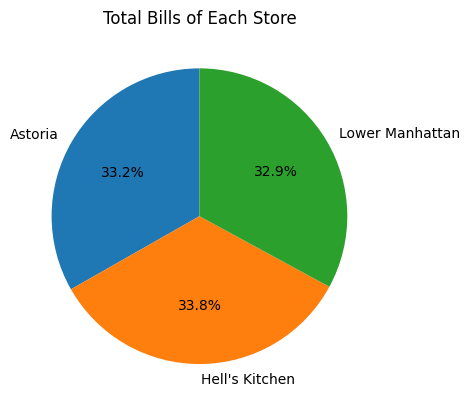

In [20]:
plt.pie(
    store_total_bills,
    labels=store_total_bills.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Total Bills of Each Store')
plt.show()

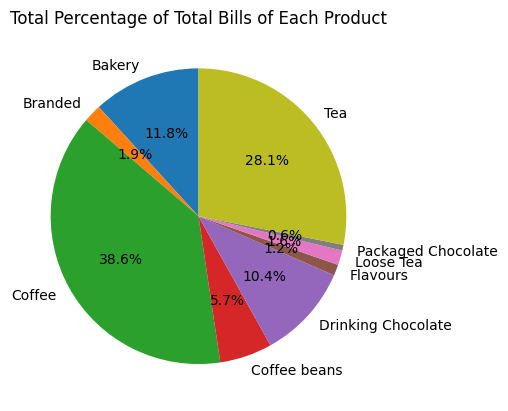

In [21]:
plt.pie(
    product_total_bills,
    labels=product_total_bills.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Total Percentage of Total Bills of Each Product')
plt.show()

In [22]:
monthly_bills = coffee.groupby('Month Name')['Total_Bill'].sum()
print(monthly_bills)

Month Name
April       118941.08
February     76145.19
January      81677.74
June        166485.88
March        98834.68
May         156727.76
Name: Total_Bill, dtype: float64


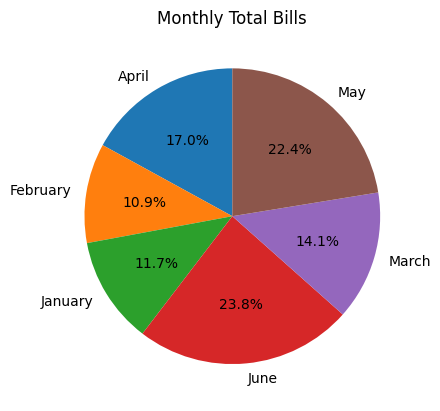

In [23]:
plt.pie(
    monthly_bills,
    labels=monthly_bills.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Monthly Total Bills')
plt.show() 

<Axes: title={'center': 'Montly Total Bills'}, xlabel='Month Name'>

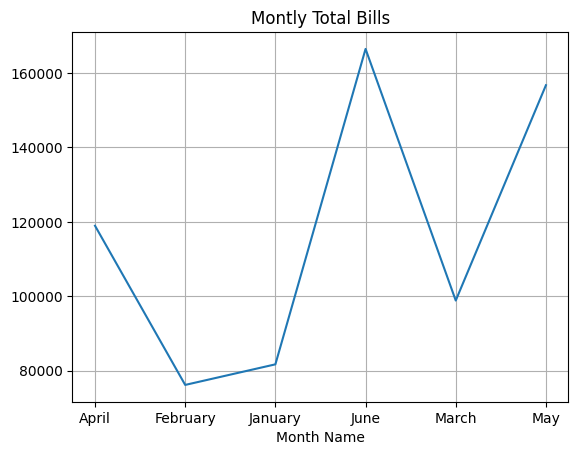

In [24]:
monthly_bills.plot(grid=True,title='Montly Total Bills',legend=False)

In [25]:
weekly_bills = coffee.groupby('Day of Week')['Total_Bill'].sum()
print(weekly_bills)

Day of Week
0    101677.28
1     99455.94
2    100313.54
3    100767.78
4    101373.00
5     96894.48
6     98330.31
Name: Total_Bill, dtype: float64


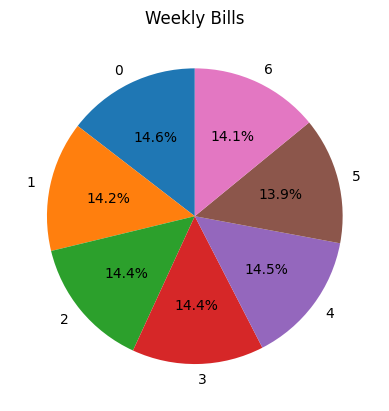

In [26]:
plt.pie(
    weekly_bills,
    labels=weekly_bills.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Weekly Bills')
plt.show() 

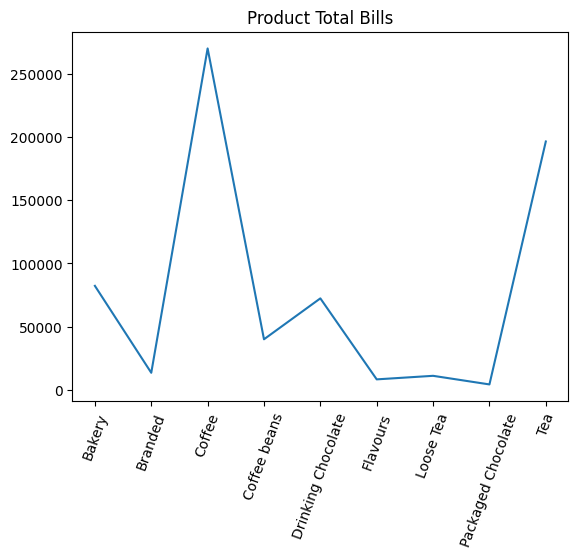

In [28]:
plt.plot(
    product_total_bills
)
plt.title('Product Total Bills')
plt.xticks(rotation=70)
plt.show()

<Axes: >

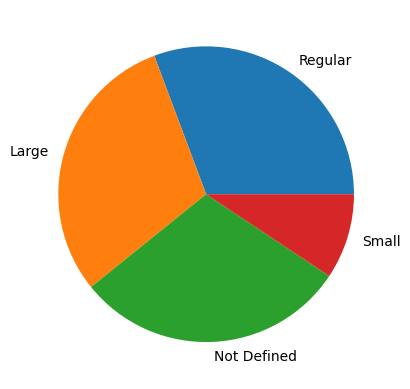

In [29]:
coffee['Size'].value_counts().plot(kind='pie')

In [30]:
peak_hour = coffee.groupby('Hour')['Total_Bill'].sum()
print(peak_hour.sort_values(ascending=False))

Hour
10    88673.39
9     85169.53
8     82699.87
7     63526.47
11    46319.14
15    41733.10
14    41304.74
16    41122.75
13    40367.45
12    40192.79
17    40134.31
18    34286.20
19    28446.68
6     21900.27
20     2935.64
Name: Total_Bill, dtype: float64


<Axes: title={'center': 'Hour Sales'}, xlabel='Hour'>

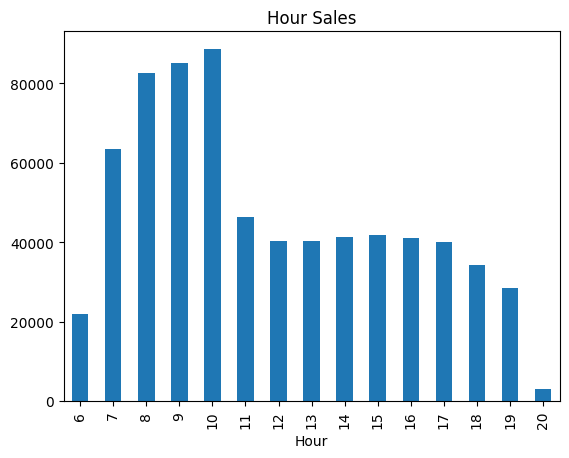

In [31]:
peak_hour.plot(x='Hour',y='Total_Bills',title='Hour Sales',kind='bar')

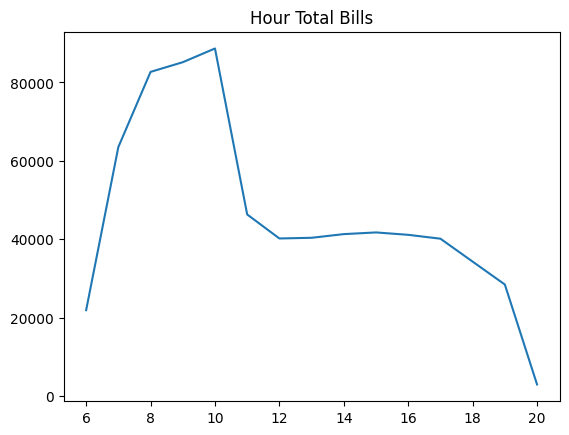

In [32]:
plt.plot(peak_hour)
plt.title('Hour Total Bills')
plt.show()

In [33]:
print(coffee['Month Name'].value_counts())

Month Name
June        35352
May         33527
April       25335
March       21229
January     17314
February    16359
Name: count, dtype: int64


In [34]:
june_data = coffee[coffee['Month Name'] == 'June']

june_product_bills = june_data.groupby('product_category')['Total_Bill'].sum()
print(june_product_bills)

product_category
Bakery                19251.27
Branded                3413.00
Coffee                64789.00
Coffee beans           9912.65
Drinking Chocolate    17106.00
Flavours               2008.00
Loose Tea              2770.65
Packaged Chocolate      992.16
Tea                   46243.15
Name: Total_Bill, dtype: float64


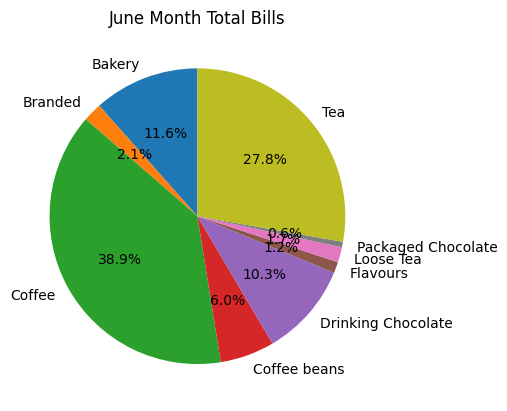

In [35]:
plt.pie(june_product_bills,
        labels=june_product_bills.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('June Month Total Bills')
plt.show() 

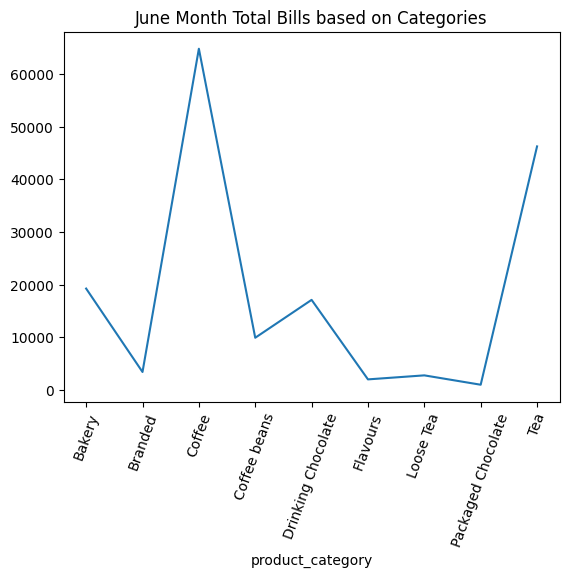

In [36]:
june_product_bills.plot(x='Products',y='Total Bills')
plt.title('June Month Total Bills based on Categories')
plt.xticks(rotation=70)
plt.show() 

In [37]:
may_product_type_bills = coffee[coffee['Month Name'] == 'May']
may_product_total = may_product_type_bills.groupby('product_type')['Total_Bill'].sum()
print(may_product_total)

product_type
Barista Espresso         20423.75
Biscotti                  4418.02
Black tea                  537.00
Brewed Black tea         10778.00
Brewed Chai tea          17427.35
Brewed Green tea          5404.50
Brewed herbal tea        10930.00
Chai tea                   961.90
Clothing                  1418.00
Drinking Chocolate         593.49
Drip coffee               7290.50
Espresso Beans            1209.20
Gourmet Beans             1653.00
Gourmet brewed coffee    15559.20
Green beans                290.00
Green tea                  314.50
Herbal tea                 581.75
Hot chocolate            16319.75
House blend Beans          738.00
Housewares                1471.00
Organic Beans             1757.50
Organic Chocolate          387.60
Organic brewed coffee     8350.20
Pastry                    5842.22
Premium Beans             3121.25
Premium brewed coffee     8739.20
Regular syrup             1368.00
Scone                     8305.28
Sugar free syrup           537.60
N

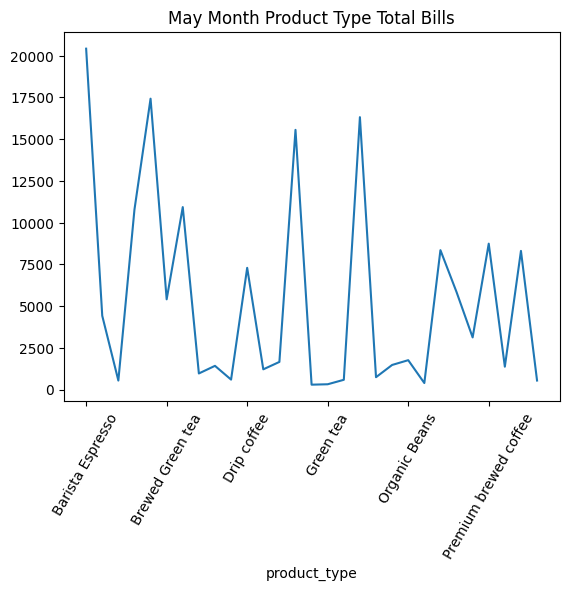

In [38]:
may_product_total.plot(x='Product Types',y='Total Bills')
plt.title('May Month Product Type Total Bills')
plt.xticks(rotation=60)
plt.show()

In [39]:
product_month_bills = coffee.groupby(['Month Name','product_category'])['Total_Bill'].sum().reset_index()
print(product_month_bills)

   Month Name    product_category  Total_Bill
0       April              Bakery    14021.70
1       April             Branded     2379.00
2       April              Coffee    45971.20
3       April        Coffee beans     6824.70
4       April  Drinking Chocolate    12266.75
5       April            Flavours     1418.40
6       April           Loose Tea     1829.15
7       April  Packaged Chocolate      873.23
8       April                 Tea    33356.95
9    February              Bakery     9038.82
10   February             Branded     1235.00
11   February              Coffee    29268.95
12   February        Coffee beans     4077.50
13   February  Drinking Chocolate     8132.25
14   February            Flavours      930.40
15   February           Loose Tea     1277.85
16   February  Packaged Chocolate      451.02
17   February                 Tea    21733.40
18    January              Bakery     9535.75
19    January             Branded     1890.00
20    January              Coffee 

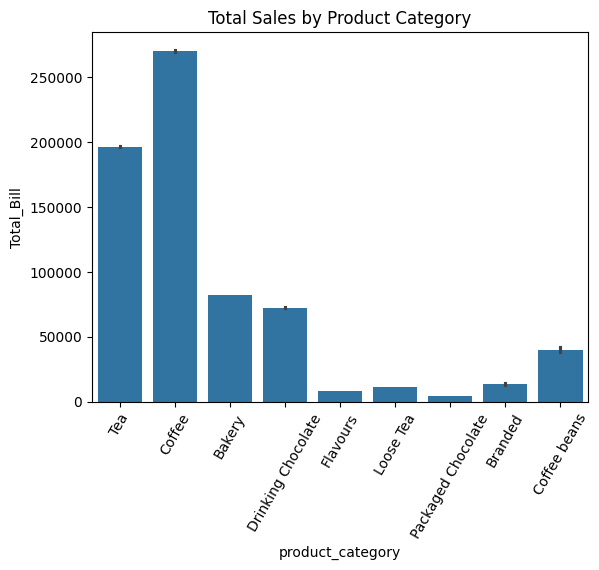

In [40]:
sns.barplot(
    data=coffee,
    x='product_category',
    y='Total_Bill',
    estimator=sum
)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=60)
plt.show()

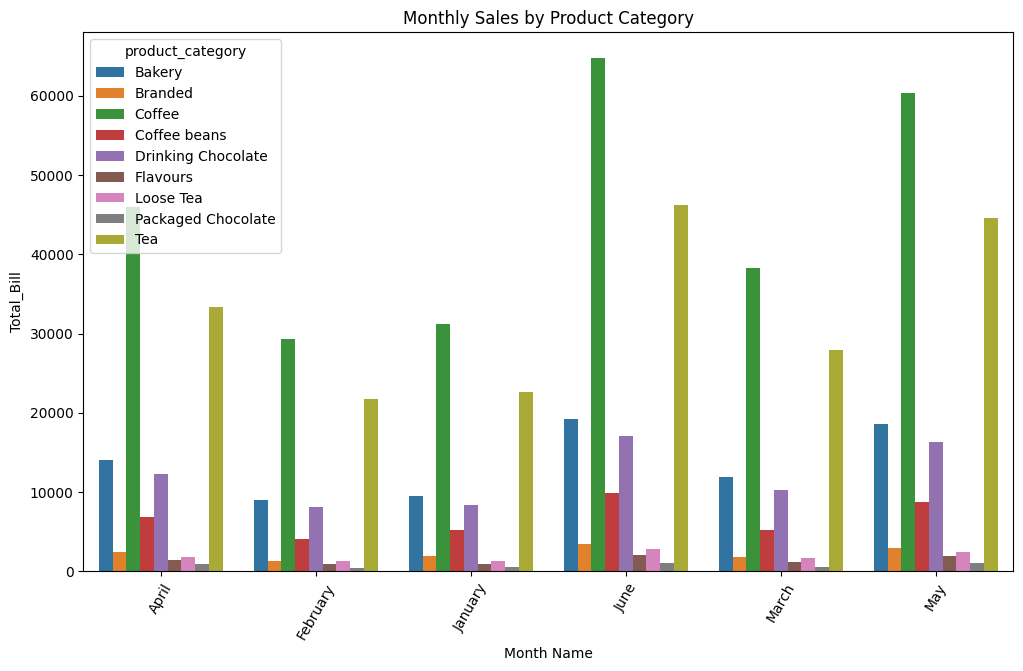

In [41]:
plt.figure(figsize=(12,7))
sns.barplot(
    data=product_month_bills,
    x='Month Name',
    y='Total_Bill',
    hue='product_category'
)
plt.xticks(rotation=60)
plt.title('Monthly Sales by Product Category')
plt.show() 

In [42]:
monthly_total = coffee.groupby(['Month','product_category'])['Total_Bill'].sum().reset_index()
print(monthly_total)

    Month    product_category  Total_Bill
0       1              Bakery     9535.75
1       1             Branded     1890.00
2       1              Coffee    31256.85
3       1        Coffee beans     5245.25
4       1  Drinking Chocolate     8337.75
5       1            Flavours      974.40
6       1           Loose Tea     1293.85
7       1  Packaged Chocolate      521.94
8       1                 Tea    22621.95
9       2              Bakery     9038.82
10      2             Branded     1235.00
11      2              Coffee    29268.95
12      2        Coffee beans     4077.50
13      2  Drinking Chocolate     8132.25
14      2            Flavours      930.40
15      2           Loose Tea     1277.85
16      2  Packaged Chocolate      451.02
17      2                 Tea    21733.40
18      3              Bakery    11902.58
19      3             Branded     1801.00
20      3              Coffee    38303.60
21      3        Coffee beans     5256.20
22      3  Drinking Chocolate    1

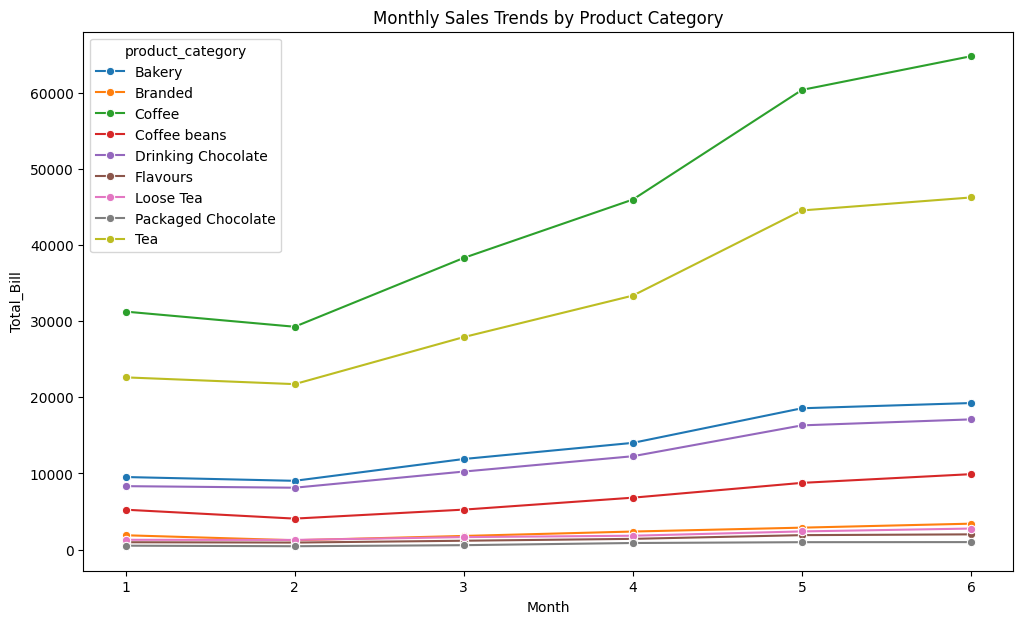

In [43]:
plt.figure(figsize=(12,7))
sns.lineplot(
    data=monthly_total,
    x='Month',
    y='Total_Bill',
    hue='product_category',
    marker='o'
)
plt.title('Monthly Sales Trends by Product Category')
plt.show()

In [44]:
print(coffee.columns)

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'Total_Bill', 'product_category', 'product_type', 'product_detail',
       'Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week',
       'month'],
      dtype='str')


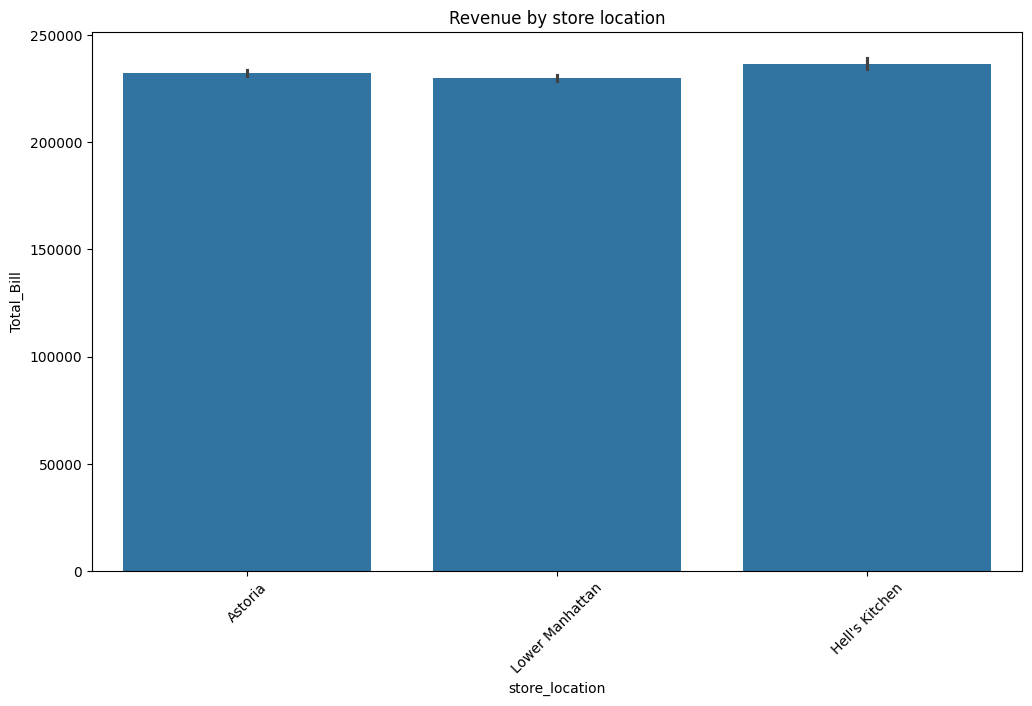

In [45]:
plt.figure(figsize=(12,7))
sns.barplot(
    data=coffee,
    x='store_location',
    y='Total_Bill',
    estimator=sum
)
plt.xticks(rotation=45)
plt.title('Revenue by store location')
plt.show() 

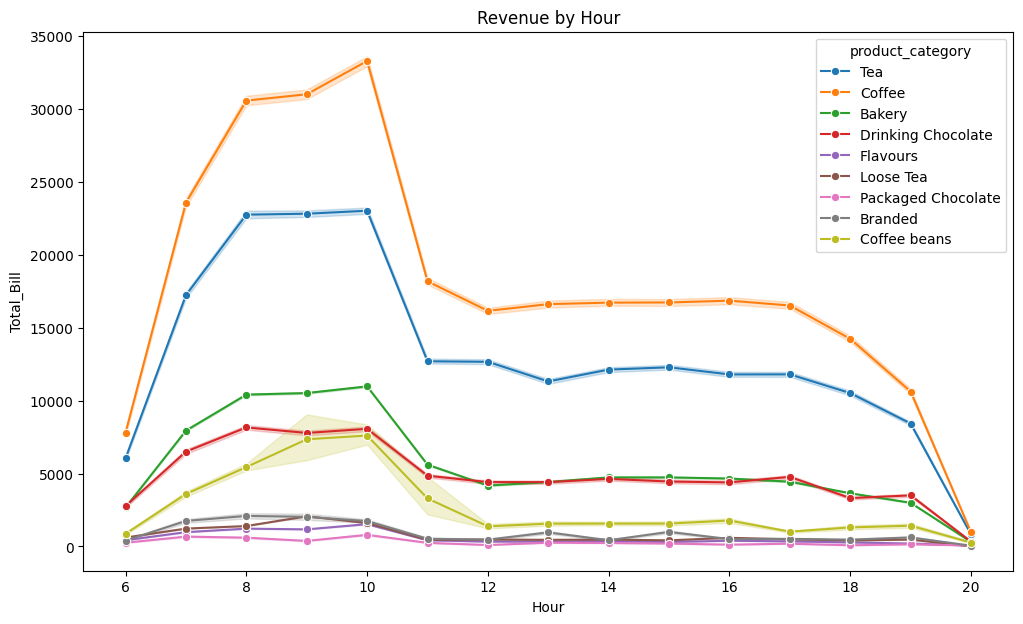

In [49]:
plt.figure(figsize=(12,7))
sns.lineplot(
    data=coffee,
    x='Hour',
    y='Total_Bill',
    hue='product_category',
    marker='o',
    estimator=sum
)
plt.title('Revenue by Hour')
plt.show() 

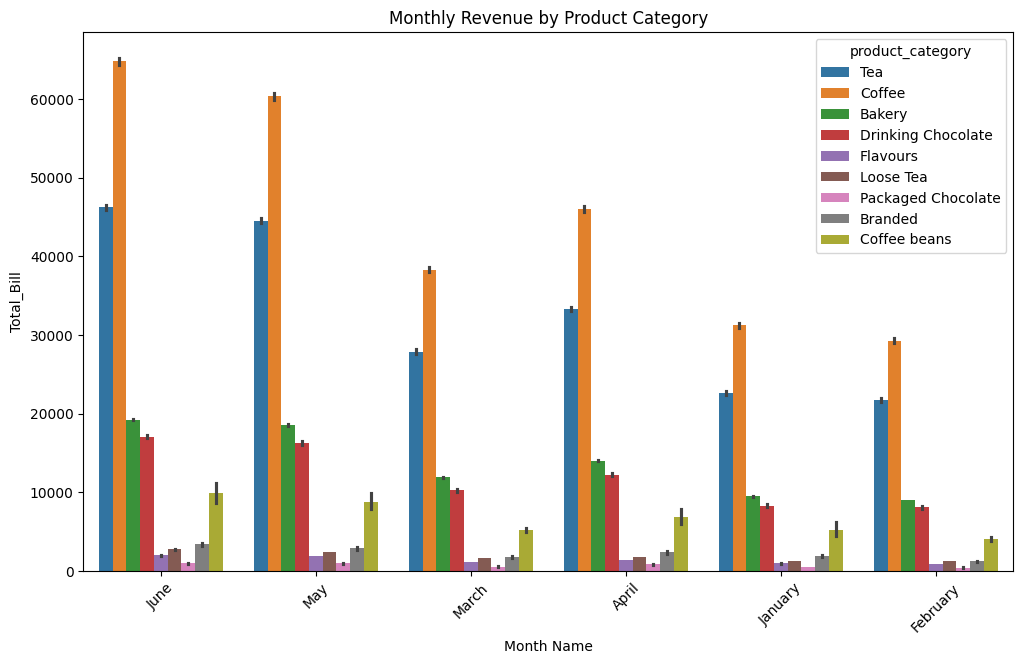

In [51]:
plt.figure(figsize=(12,7))
sns.barplot(
    data=coffee,
    x='Month Name',
    y='Total_Bill',
    hue='product_category',
    estimator=sum
)
plt.xticks(rotation=45)
plt.title('Monthly Revenue by Product Category')
plt.show() 

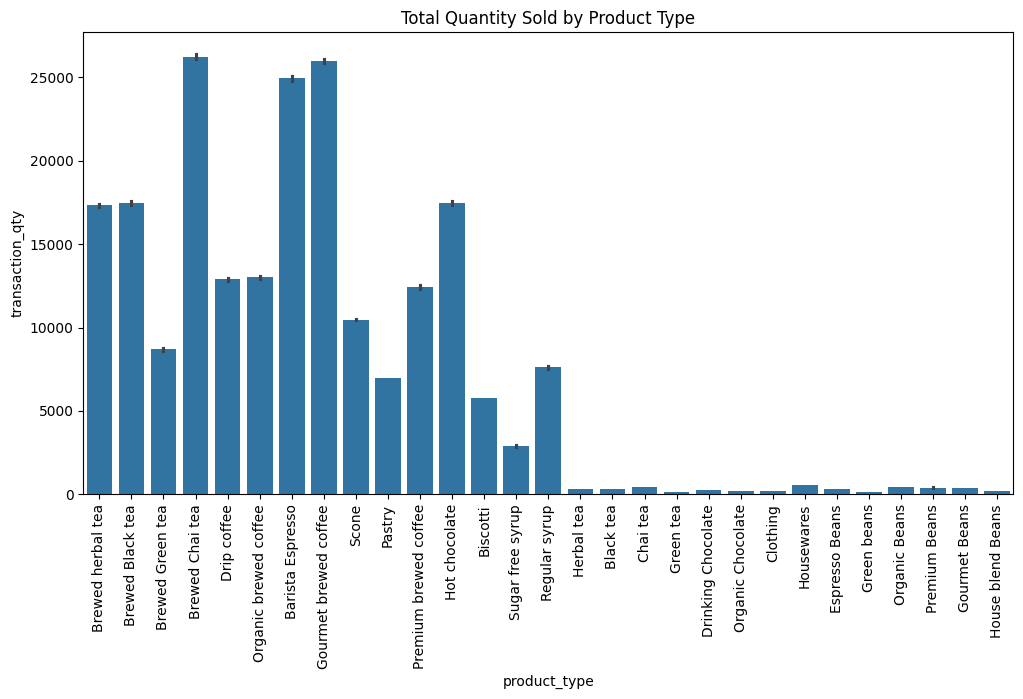

In [53]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=coffee,
    x='product_type',
    y='transaction_qty',
    estimator=sum
)
plt.xticks(rotation=90)
plt.title('Total Quantity Sold by Product Type')
plt.show() 

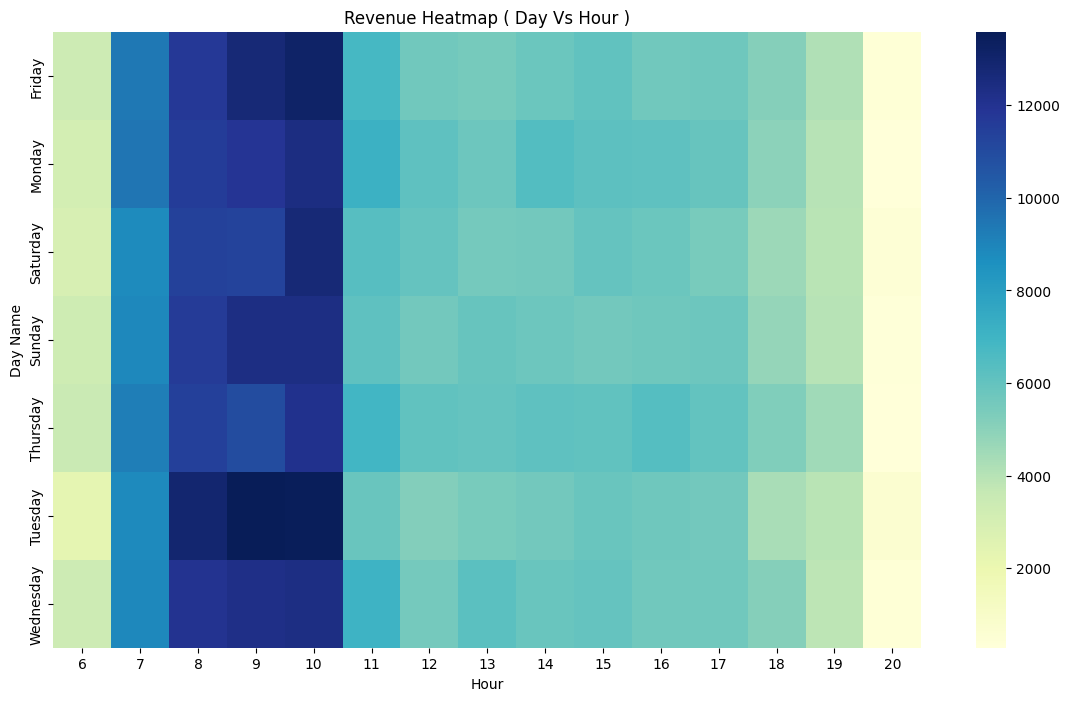

In [55]:
pivot_table = coffee.pivot_table(
    values='Total_Bill',
    index='Day Name',
    columns='Hour',
    aggfunc='sum'
)
plt.figure(figsize=(14,8))
sns.heatmap(pivot_table,cmap='YlGnBu')
plt.title('Revenue Heatmap ( Day Vs Hour )')
plt.show() 